# Python Data Analysis For Newbies (Colab)

This Collaboratory Notebook is a collection of source code available in the Python Data Analysis For Newbies. As of September 10, 2020, it works well if you run it from the top.




# Required Library

If you start from the top, each cell can be executed without any problems. If you start from the middle, you may not be able to run the program because it does not import the libraries, so run the following cells and import all the necessary libraries together if necessary.


In [ ]:
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# Numpy
import numpy as np

# Pandas
import pandas as pd
import pandas_datareader.data as web

# Scikit-Learn
from sklearn import datasets
from sklearn import svm

# Tensorflow
import tensorflow as tf

# Others
import datetime

# If you don't have the module installed, use the magic command pip install.
# !pip install pandas_datareader 

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# 6. GPU environment ーGoogle Colaboratory

## Confirm that the GPU is available.

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11156806274013160606, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11007923172772540183
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11219125184833321940
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7298761376
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2609774523640095978
 physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"]

# 7. Minimal MNIST deeper learning

In [ ]:
# Import the required library
from __future__ import absolute_import, division, print_function, unicode_literals

# Import TensorFlow
import tensorflow as tf

In [ ]:
# Load MNIST Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(type(x_train))

<class 'numpy.ndarray'>


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


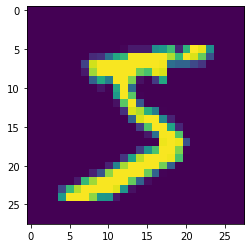

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
print(y_train[0])

5


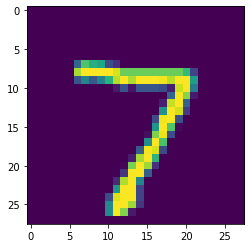

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_test[0]

7

In [ ]:
#　Building a Deep Learning Model
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(784, )),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
                                    ])
# Compilation and overview of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2

In [ ]:
# Preprocessing of MNIST data (flatten 28 x 28 pixel to 784 for input)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Casting to a float32 type because of a true divide error when dividing by itself
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizes data to a float32 type in the range of 0 to 1
x_train /= 255
x_test /= 255

# Convert to categorical data (1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
model.fit(x_train, y_train, epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3193 - accuracy: 0.9022 - val_loss: 0.1447 - val_accuracy: 0.9560
Epoch 2/20
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1469 - accuracy: 0.9557 - val_loss: 0.1285 - val_accuracy: 0.9635
Epoch 3/20
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1145 - accuracy: 0.9669 - val_loss: 0.1015 - val_accuracy: 0.9716
Epoch 4/20
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0951 - accuracy: 0.9710 - val_loss: 0.1009 - val_accuracy: 0.9712
Epoch 5/20
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0823 - accuracy: 0.9745 - val_loss: 0.1012 - val_accuracy: 0.9737
Epoch 6/20
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0738 - accuracy: 0.9774 - val_loss: 0.0922 - val_accuracy: 0.9748
Epoch 7/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.1009 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0937 - accuracy: 0.9795


[0.09366001188755035, 0.9794999957084656]

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
import numpy as np
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

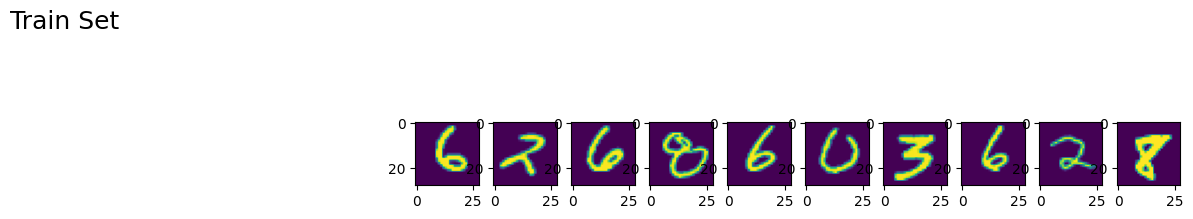

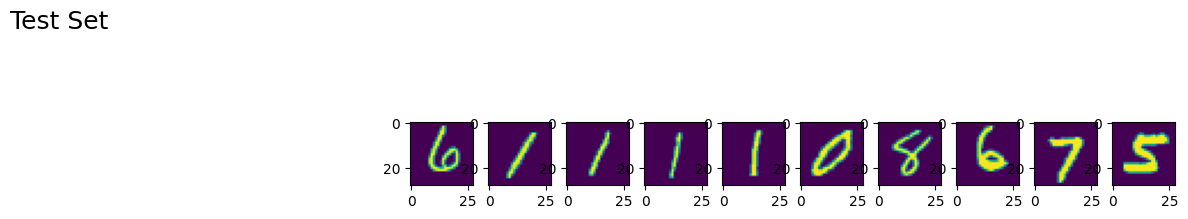

In [ ]:
import matplotlib.pyplot as plt
(xo_train, yo_train), (xo_test, yo_test) = tf.keras.datasets.mnist.load_data()

def plot_random10(mnist_data, title):
  """ Get 10 randomly from mnist data and draw
  """
  fig = plt.figure(figsize=(28,28), dpi=100)
  fig.suptitle(title, fontsize=18, x=0, y=0.92)
  for index, x in enumerate(mnist_data[np.random.choice(np.arange(0, len(mnist_data)), 10, replace=False)], 1):
    ax = fig.add_subplot(28, 28, index)
    plt.imshow(x)
    
plot_random10(xo_train, 'Train Set')
plot_random10(xo_test, 'Test Set')

In [ ]:
model.fit(x_train, y_train, epochs=100, validation_split=0.3)
prediction = model.predict(x_test)

Epoch 1/100
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0325 - accuracy: 0.9910 - val_loss: 0.1161 - val_accuracy: 0.9762
Epoch 2/100
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9914 - val_loss: 0.1266 - val_accuracy: 0.9763
Epoch 3/100
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0340 - accuracy: 0.9900 - val_loss: 0.1024 - val_accuracy: 0.9786
Epoch 4/100
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.1300 - val_accuracy: 0.9757
Epoch 5/100
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9903 - val_loss: 0.1259 - val_accuracy: 0.9766
Epoch 6/100
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0286 - accuracy: 0.9918 - val_loss: 0.1112 - val_accuracy: 0.9776
Epoch 7/100
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.1200 - val_ac

In [ ]:
print(prediction[0])

In [ ]:
import numpy as np

print(np.argmax(prediction[0]))

In [ ]:
print(np.argmax(y_test[0]))

#8. Python

In [ ]:
import this

In [ ]:
print("Hello Pythonic World!")


In [ ]:
pythonic_english_list = [
  "The Zen of Python, by Tim Peters",
  "Beautiful is better than ugly.",
  "Explicit is better than implicit.",
  "Simple is better than complex.",
  "Complex is better than complicated.",
  "Flat is better than nested.",
  "Sparse is better than dense.",
  "Readability counts.",
  "Special cases aren't special enough to break the rules.",
  "Although practicality beats purity.",
  "Errors should never pass silently.",
  "Unless explicitly silenced.",
  "In the face of ambiguity, refuse the temptation to guess.",
  "There should be one-- and preferably only one --obvious way to do it.",
  "Although that way may not be obvious at first unless you're Dutch.",
  "Now is better than never.",
  "Although never is often better than *right* now.",
  "If the implementation is hard to explain, it's a bad idea.",
  "If the implementation is easy to explain, it may be a good idea.",
  "Namespaces are one honking great idea -- let's do more of those!"
]

pythonic_japanese_list = [
  "Python哲学　ティム・ピーターズ",
  "「綺麗さ」は「汚さ」よりも良い。",
  "「明示的」は「暗示的」よりも良い。",
  "「シンプル」は「複雑」よりも良い。",
  "「込み入っている」よりは「複雑」な方がマシ。",
  "「ネスト構造」より「フラットな構造」の方が良い。",
  "「密」より「疎」の方が良い。",
  "「読みやすさ」が重要。",
  "特殊なケースはルールを破るほど特別ではない。",
  "実用性は純粋さに勝る。",
  "エラーは静かに通過してはいけない。",
  "明示的に静かにしていない限りは。",
  "曖昧なコードがあった時、推測して突き進む誘惑に負けないで。",
  "１つだけ、できれば１つだけ明らかに良い方法があるはずだ。",
  "その方法はオランダ人でない限り最初はわからないかもしれない。",
  "今が一番良い。",
  "しかし「今」は、「たった今」には負ける。",
  "その実装を説明するのが難しければ、それは悪いアイデアだ。",
  "その実装を説明するのが簡単であれば、それは良いアイデアかもしれない。",
  "ネームスペース（名前空間）はとても素晴らしいアイデアなので、もっと使うべきだ。"
]

for english, japanese in zip(pythonic_english_list, pythonic_japanese_list):
  print(f'英語：{english}／日本語：{japanese}')

In [ ]:
print(zip.__iter__)

In [ ]:
diversity_list = [1, 'One', 1.0, {'1':'One'}, {'One'}]
for element in diversity_list:
  print(element)

In [ ]:
diversity_list = [1, 'One', 1.0, {'1':'One'}, {'One'}]
for element in diversity_list:
  print(type(element))

In [ ]:
def get_pythonic_language(texts):
  """ Return which language a pythonic sentence is written in.

     @Args:
       texts(str):input text
      @Returns:
       language(str):language of the input text
  """
  pythonic_english_list = [
  "The Zen of Python, by Tim Peters",
  "Beautiful is better than ugly.",
  "Explicit is better than implicit.",
  "Simple is better than complex.",
  "Complex is better than complicated.",
  "Flat is better than nested.",
  "Sparse is better than dense.",
  "Readability counts.",
  "Special cases aren't special enough to break the rules.",
  "Although practicality beats purity.",
  "Errors should never pass silently.",
  "Unless explicitly silenced.",
  "In the face of ambiguity, refuse the temptation to guess.",
  "There should be one-- and preferably only one --obvious way to do it.",
  "Although that way may not be obvious at first unless you're Dutch.",
  "Now is better than never.",
  "Although never is often better than *right* now.",
  "If the implementation is hard to explain, it's a bad idea.",
  "If the implementation is easy to explain, it may be a good idea.",
  "Namespaces are one honking great idea -- let's do more of those!"
  ]
  pythonic_japanese_list = [
  "Python哲学　ティム・ピーターズ",
  "「綺麗さ」は「汚さ」よりも良い。",
  "「明示的」は「暗示的」よりも良い。",
  "「シンプル」は「複雑」よりも良い。",
  "「込み入っている」よりは「複雑」な方がマシ。",
  "「ネスト構造」より「フラットな構造」の方が良い。",
  "「密」より「疎」の方が良い。",
  "「読みやすさ」が重要。",
  "特殊なケースはルールを破るほど特別ではない。",
  "実用性は純粋さに勝る。",
  "エラーは静かに通過してはいけない。",
  "明示的に静かにしていない限りは。",
  "曖昧なコードがあった時、推測して突き進む誘惑に負けないで。",
  "１つだけ、できれば１つだけ明らかに良い方法があるはずだ。",
  "その方法はオランダ人でない限り最初はわからないかもしれない。",
  "今が一番良い。",
  "しかし「今」は、「たった今」には負ける。",
  "その実装を説明するのが難しければ、それは悪いアイデアだ。",
  "その実装を説明するのが簡単であれば、それは良いアイデアかもしれない。",
  "ネームスペース（名前空間）はとても素晴らしいアイデアなので、もっと使うべきだ。"
  ]
  language = ""
  if texts in pythonic_english_list:
    language = "english"
  elif texts in pythonic_japanese_list:
    language = "japanese"
  else:
    language = "not pythonic"
  return language

print(get_pythonic_language("Now is better than never."))

# ９）Pandas

In [1]:
import pandas as pd
year_index = {'Year':[y for y in range(2010, 2031)], 
               'Index':[i for i in range(21)],
              }
print(year_index)

{'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030], 'Index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [2]:
df = pd.DataFrame(year_index)

In [3]:
print(df.head())

   Year  Index
0  2010      0
1  2011      1
2  2012      2
3  2013      3
4  2014      4


In [4]:
df.head(10)

,Year,Index
0,2010,0
1,2011,1
2,2012,2
3,2013,3
4,2014,4
5,2015,5
6,2016,6
7,2017,7
8,2018,8
9,2019,9


In [5]:
df.sample(5)

,Year,Index
6,2016,6
12,2022,12
9,2019,9
0,2010,0
17,2027,17


In [6]:
import random
years_random1 = {'Year':[y for y in range(2010, 2031)], 
                 'Random':[random.random() for y in range(21)],
                }
df1 = pd.DataFrame(years_random1)      

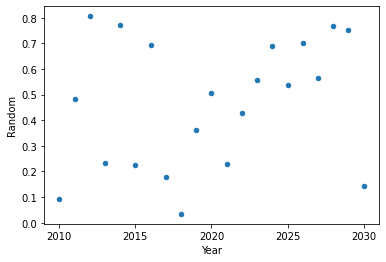

In [7]:
df1.plot(x=df1.columns[0], y=df1.columns[1], kind='scatter', xticks=[year for year in range(2010, 2031, 5)])

In [8]:
years_random2 = {'Year':[y for y in range(2011, 2032)], 
                 'Random':[random.random() for y in range(21)],
                }
df2 = pd.DataFrame(years_random2)    

In [9]:
pd.merge(df1, df2, on='Year', how='inner')

,Year,Random_x,Random_y
0,2011,0.481422,0.074234
1,2012,0.805779,0.092231
2,2013,0.234039,0.452158
3,2014,0.770878,0.846439
4,2015,0.223468,0.897333
5,2016,0.693177,0.016318
6,2017,0.176854,0.745151
7,2018,0.034138,0.156746
8,2019,0.363127,0.338129
9,2020,0.506399,0.192292


In [10]:
pd.merge(df1, df2, on='Year', how='outer')

,Year,Random_x,Random_y
0,2010,0.091256,NaN
1,2011,0.481422,0.074234
2,2012,0.805779,0.092231
3,2013,0.234039,0.452158
4,2014,0.770878,0.846439
5,2015,0.223468,0.897333
6,2016,0.693177,0.016318
7,2017,0.176854,0.745151
8,2018,0.034138,0.156746
9,2019,0.363127,0.338129


In [11]:
pd.merge(df1, df2, on='Year', how='left')

,Year,Random_x,Random_y
0,2010,0.091256,NaN
1,2011,0.481422,0.074234
2,2012,0.805779,0.092231
3,2013,0.234039,0.452158
4,2014,0.770878,0.846439
5,2015,0.223468,0.897333
6,2016,0.693177,0.016318
7,2017,0.176854,0.745151
8,2018,0.034138,0.156746
9,2019,0.363127,0.338129


In [12]:
pd.merge(df1, df2, on='Year', how='right')

,Year,Random_x,Random_y
0,2011,0.481422,0.074234
1,2012,0.805779,0.092231
2,2013,0.234039,0.452158
3,2014,0.770878,0.846439
4,2015,0.223468,0.897333
5,2016,0.693177,0.016318
6,2017,0.176854,0.745151
7,2018,0.034138,0.156746
8,2019,0.363127,0.338129
9,2020,0.506399,0.192292


In [13]:
df1.to_csv('sample.csv', index=None)

In [ ]:
df1_r = pd.read_csv('sample.csv', encoding='utf8')

In [ ]:
df1_r.head()

In [ ]:
df1_r.at[3, 'Year']

In [ ]:
df1_r.iat[3, 0]

In [ ]:
df1_r.loc[0:2, 'Year':'Random']

In [ ]:
df1_r.iloc[0:3, 0:2]

In [ ]:
df1_r[df1_r.Year>=2020]

df1_r[df1_r['Year']>=2020]

In [ ]:
!pip install pandas-datareader

In [ ]:
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2020,4,1)

df = web.DataReader("dia", "yahoo", start, end).dropna()
print(df.tail(100))

df['Adj Close'].plot()
plt.show()

# １０）Numpy

In [ ]:
import numpy as np
np.__config__.show()

In [ ]:
import random
list1 = [random.random() for i in range(10)]
np_arr = np.array(list1)

In [ ]:
np_arr.itemsize

In [ ]:
np_arr.size

In [ ]:
for i, elm in enumerate(np_arr):
  print(i, id(np_arr[i]), elm)

In [ ]:
for i, elm in enumerate(list1):
  print(i, id(list1[i]), elm)

In [ ]:
import numpy as np

z = np.zeros((3,3))
print(z)

In [ ]:
def print_ndr_basic_info(z):
  print(type(z))
  print(z.shape)
  print(z.itemsize)
  print(z.size)
  print(z.dtype)
  print(z.ndim)

print_ndr_basic_info(z)

In [ ]:
z = np.zeros(10, dtype='float32')
print(z.dtype)

In [ ]:
z = np.ones(10, dtype='float32')
z

In [ ]:
z = np.empty(10, dtype='float32')
z

In [ ]:
z = np.linspace(2, 10, 5)

In [ ]:
z.dtype

In [ ]:
z = z.astype('float32')

In [ ]:
z.dtype

In [ ]:
np.random.seed(0)
z1 = np.random.randint(10, size=100)
z1

In [ ]:
import numpy as np

In [ ]:
b_list = [[9,8,7],[1,2,3],[4,5,6]]
z = np.array(b_list)
z

In [ ]:
z.shape?

In [ ]:
z.shape

In [ ]:
z[0]

In [ ]:
z[0,0]

In [ ]:
z[0:2, 0:2]

In [ ]:
z[-1, -1]

## CIFAR10: Outline

1. ILSVRC (International Image Recognition Contest) 2012 winner AlexNet's
2. maintained by Alex Krizhevsky
3.RGB color image
4. 10 classes of labels: airplane, automobile, bird, cat, cat, deer, dog, frog, horse, ship, and truck
5.60,000 images (50,000 training images and 10,000 test images)
6. Image size is 32 pixels x 32 pixels
7. Loadable from keras (Tensorflow's wrapper library)




In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print_ndr_basic_info(x_train)
print_ndr_basic_info(x_test)
print_ndr_basic_info(y_train)
print_ndr_basic_info(y_test)


In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_test[9999])

In [ ]:
z = np.array([[1,2,3],[4,5,6],[7,8,9]])
z[::-1]

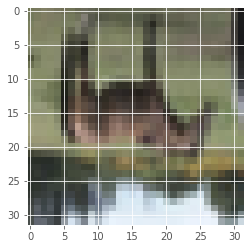

In [ ]:
plt.imshow(x_test[9999][::-1])

In [ ]:
z = np.array([[1,2,3],[4,5,6],[7,8,9]])
z[:, ::-1]

array([[3, 2, 1],
       [6, 5, 4],
       [9, 8, 7]])

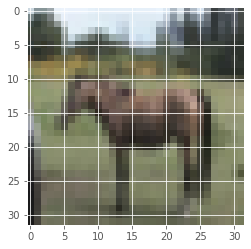

In [ ]:
plt.imshow(x_test[9999][:, ::-1])

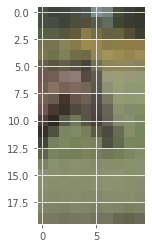

In [ ]:
plt.imshow(x_test[9999][5:25, 20:30])

In [ ]:
z = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]])
print(z)
print(z.shape)
print(z[::2, ::2])
print(z[::2, ::2].shape)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
(5, 5)
[[ 1  3  5]
 [11 13 15]
 [21 23 25]]
(3, 3)


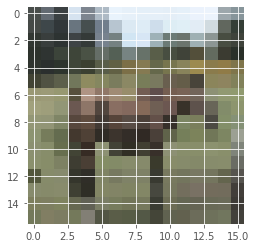

In [ ]:
plt.imshow(x_test[9999][::2, ::2])

In [ ]:
photo = x_test[9999]
def print_labeled_val(label, val):
  print(f"{label}:{val}")

print_labeled_val("Sum", np.sum(photo))
print_labeled_val("product of each element of arrays",np.prod(photo))
print_labeled_val("mean", np.mean(photo))
print_labeled_val("standard deviation", np.std(photo))
print_labeled_val("variance", np.var(photo))
print_labeled_val("minimum value", np.min(photo))
print_labeled_val("maximum value",np.max(photo))
print_labeled_val("the minimum element's index", np.argmin(photo))
print_labeled_val("the maximum element's index", np.argmax(photo))

Sum:331662
product of each element of arrays:0
mean:107.962890625
standard deviation:46.36682798593862
variance:2149.8827374776206
minimum value:25
maximum value:252
the minimum element's index:1745
the maximum element's index:38


In [ ]:
z = np.array([1,2,3,4,5])
z <= 3

array([ True,  True,  True, False, False])

In [ ]:
z[z<=3]

array([1, 2, 3])

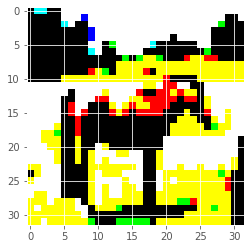

In [ ]:
# Convert to 255 if each RGB value is greater than 100, or to 0 if it is less than or equal to 100.
photo = x_test[9999]
photo_masked = np.where(photo > 100, 255, 0)
plt.imshow(photo_masked)

In [ ]:
a = np.array([1,2,3,4,5])
print(a + 2)
print(a - 2)
print(a * 2)
print(a / 2)

[3 4 5 6 7]
[-1  0  1  2  3]
[ 2  4  6  8 10]
[0.5 1.  1.5 2.  2.5]


In [ ]:
a_array = np.array([[1,3,5],[7,9,11]])
b_array = np.array([[10],[20]])
print(a_array.shape)
print(b_array.shape)

(2, 3)
(2, 1)


In [ ]:
print(a_array + b_array)
print(a_array - b_array)
print(a_array / b_array)
print(a_array * b_array)

[[11 13 15]
 [27 29 31]]
[[ -9  -7  -5]
 [-13 -11  -9]]
[[0.1  0.3  0.5 ]
 [0.35 0.45 0.55]]
[[ 10  30  50]
 [140 180 220]]


Dot product
$$
    w\cdot x = \sum_{i=0}^{n}w_ix_i
$$

In [ ]:
w = np.array([1,2,3])
x = np.array([4,5,6])
print(np.dot(w,x))
print(w.dot(x))
print(w@x)

32
32
32


In [ ]:
w = np.array([[1,2],[4,5]])
x = np.array([[1,2],[3,4]])
print(w)
print(x)
print(w@x)

[[1 2]
 [4 5]]
[[1 2]
 [3 4]]
[[ 7 10]
 [19 28]]


In [ ]:
!python --version

Python 3.6.9


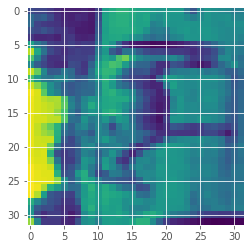

In [ ]:
plt.imshow(photo[:,:,0].T)

In [ ]:
x = np.array([2,1,3,4,5])
print(x)
print(np.sort(x))

[2 1 3 4 5]
[1 2 3 4 5]


# １１）Matplotlib

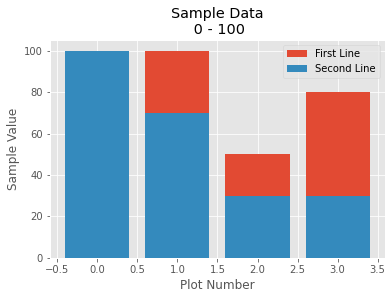

In [ ]:
import matplotlib.pyplot as plt
x = [0,1,2,3]
y = [10, 100, 50, 80]
x2 = [0,1,2,3]
y2 = [100, 70, 30, 30]

plt.bar(x, y, label='First Line')
plt.bar(x2,y2, label='Second Line')

plt.xlabel('Plot Number')
plt.ylabel('Sample Value')
plt.title('Sample Data\n 0 - 100')
plt.legend()
plt.show()

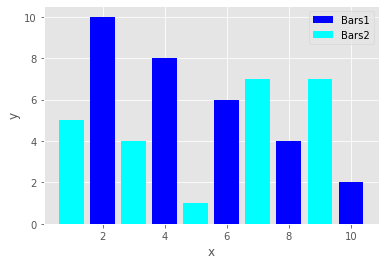

In [ ]:
import matplotlib.pyplot as plt
import random
x = [i for i in range(2, 11, 2)]
y = [i for i in range(10, 1, -2)]

x2 = [i for i in range(1, 10, 2)]
y2 = [random.randint(0, 10) for i in range(11, 1, -2)]

plt.bar(x, y, label='Bars1', color='blue')
plt.bar(x2, y2, label='Bars2', color='cyan')

plt.xlabel('x')
plt.ylabel('y')
plt.title('')
plt.legend()
plt.show()

No handles with labels found to put in legend.


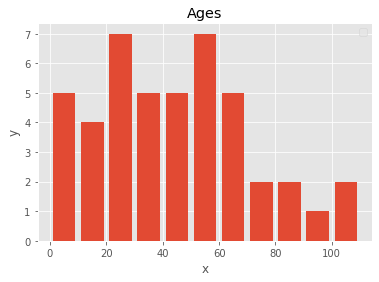

In [ ]:
import matplotlib.pyplot as plt

population_ages = [2, 7, 75, 55, 55, 46, 60, 65, 68, 59, 45, 48, 58, 55, 8, 10, 100, 95, 40, 39, 34, 28, 2, 29, 34, 3, 46, 50, 20, 30, 80, 60, 68, 58, 23,12, 102,79,80, 39, 20, 21, 20, 18, 19]
bins = [i for i in range(0, 120, 10)]
plt.hist(population_ages, bins, histtype='bar', rwidth=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ages')
plt.legend()
plt.show()

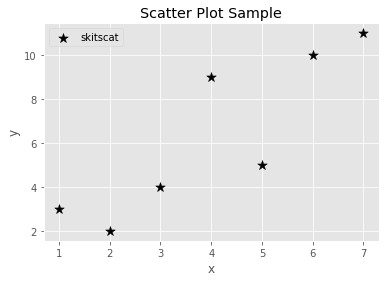

In [ ]:
x = [1,2,3,4,5,6,7]
y = [3,2,4,9,5,10,11]
plt.scatter(x, y, label='skitscat', color='black', marker='*', s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot Sample')
plt.legend()
plt.show()

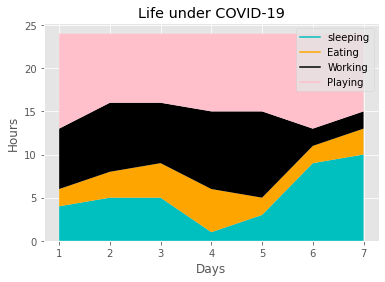

In [ ]:
import matplotlib.pyplot as plt
days = [1,2,3,4,5,6,7]

sleeping = [4,5,5,1,3,9,10]
eating = [2,3,4,5,2,2,3]
working = [7,8,7,9,10,2,2]
playing = [11,8,8,9,9,11,9]
plt.plot([],[],color='c', label='sleeping')
plt.plot([],[],color='orange',label='Eating')
plt.plot([],[],color='k',label='Working')
plt.plot([],[],color='pink',label='Playing')

plt.stackplot(days, sleeping, eating, working, playing, colors=['c', 'orange', 'k', 'pink'])
plt.xlabel('Days')
plt.ylabel('Hours')
plt.title('Life under COVID-19')
plt.legend()
plt.show()

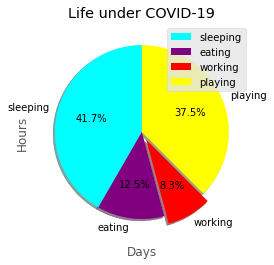

In [ ]:
import matplotlib.pyplot as plt
days = [1,2,3,4,5,6,7]

sleeping = [4,5,5,1,3,9,10]
eating = [2,3,4,5,2,2,3]
working = [7,8,7,9,10,2,2]
playing = [11,8,8,9,9,11,9]
slices = [10, 3, 2, 9]
activities = ['sleeping','eating','working','playing']
colors = ['cyan', 'purple', 'red', 'yellow']
plt.pie(slices, labels=activities, colors=colors, startangle=90, shadow=True, explode=(0, 0, 0.1, 0), autopct="%1.1f%%")

plt.xlabel('Days')
plt.ylabel('Hours')
plt.title('Life under COVID-19')
plt.legend()
plt.show()

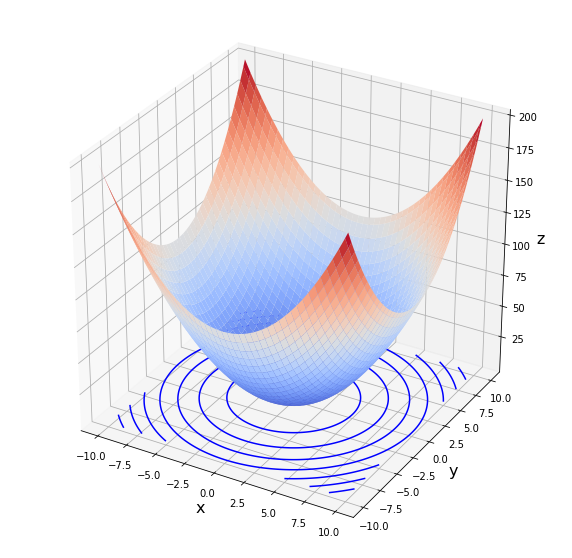

In [ ]:
# 3D Plot
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_func(X, Y, Z):
  """ Three-dimensional plot of a function Z with inputs of two variables X and Y
    
    Args:
      X: ndarray
      Y: ndarray
      Z: ndarray
  """
  fig = plt.figure(figsize = (10, 10))
  ax = fig.add_subplot(1, 1, 1, projection="3d")

  ax.set_xlabel("x", size = 16)
  ax.set_ylabel("y", size = 16)
  ax.set_zlabel("z", size = 16)
  ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
#  ax.plot_surface(X, Y, Z, cmap=cm.summer)

  ax.contour(X, Y, Z, colors = "blue", offset = -1)
#  ax.scatter(X, Y, Z)

  plt.show()

def func_z1(X, Y):
  return X**2 + Y**2

# Generates 256 elements equally spaced from -10 to 10
x = np.linspace(-10, 10, 256)
y = np.linspace(-10, 10, 256)

# Grid Generation
X, Y = np.meshgrid(x, y)

# Calling func_z1
Z = func_z1(X, Y)

# 3D Plot
plot_3d_func(X, Y, Z)

$$
 Z = X^2 + Y^2
$$

In [ ]:
x_sample = np.array([1,2,3])
y_sample = np.array([1,2,3])
X_sample, Y_sample = np.meshgrid(x_sample, y_sample)
print(X_sample)
print(Y_sample)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


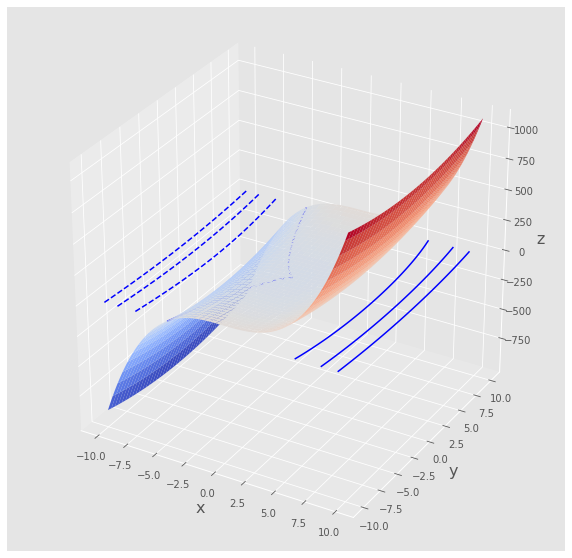

In [ ]:
def func_z2(X, Y):
  return X**3 + Y**2
Z = func_z2(X, Y)
plot_3d_func(X, Y, Z)

$$
  Z = X^3 + Y^2
$$

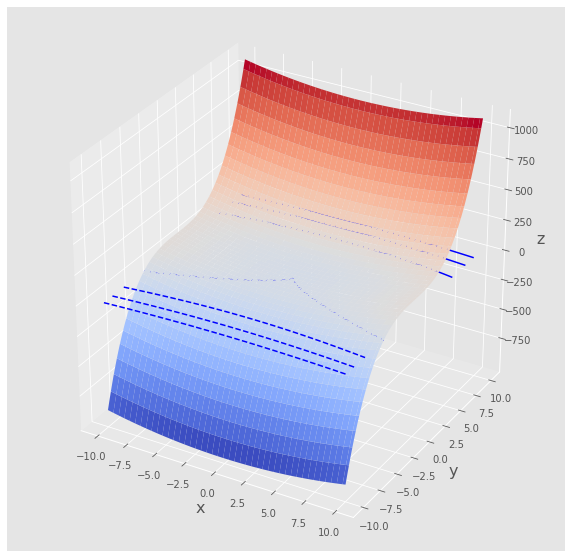

In [ ]:
def func_z3(X, Y):
  return X**2 + Y**3

Z = func_z3(X, Y)
plot_3d_func(X, Y, Z)

# １２）Scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

## SVM

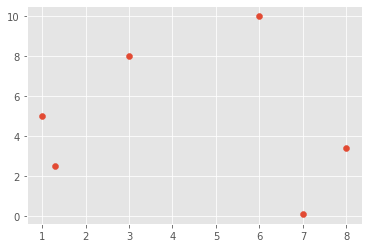

In [ ]:
x = [1, 3, 8, 1.3, 7, 6]
y = [5, 8, 3.4, 2.5, 0.1, 10]
plt.scatter(x, y)
plt.show()

In [ ]:
X = np.array([
    [1, 5],
    [3, 8],
    [8, 3.4],
    [1.3, 2.5],
    [7, 0.1],
    [6, 10]]
)

t = np.array([0, 0, 1, 0, 1, 1])

In [ ]:
clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X, t)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(clf.predict(np.array([[0.38, 0.8]])))

[0]


weight:-9.899998505029213


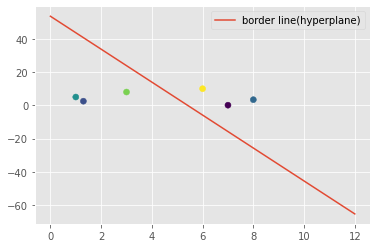

In [ ]:
w = clf.coef_[0]

a = -w[0] / w[1]

print(f"weight:{a}")

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, '-', label="border line(hyperplane)")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

In [ ]:
X_test = np.array([[0.38, 0.8], [6, 8], [7,7], [8, 4], [2, 2]])
y_test = np.array([0, 1, 1, 1, 0])
prediction = clf.predict(X_test)
print(f"Accuracy:{100 * len(y_test[y_test == prediction])/len(X_test)}%")

Accuracy:100.0%


## RandomForest

In [ ]:
#　Training by RandomForest
from sklearn.ensemble import RandomForestClassifier as classifier
random_forest = classifier(random_state=0)
random_forest.fit(X, t)


#　Inference by RandomForest
X_test = np.array([[0.38, 0.8], [6, 8], [7,7], [8, 4], [2, 2]])
y_test = np.array([0, 1, 1, 1, 0])
prediction = random_forest.predict(X_test)
print(f"Accuracy:{100 * len(y_test[y_test == prediction])/len(y_test)}%")


Accuracy:100.0%


## XGBoost

In [ ]:
#　Training with the XgBoost Model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X, t)

#　Inference by XgBoost Model
X_test = np.array([[0.38, 0.8], [6, 8], [7,7], [8, 4], [2, 2]])
y_test = np.array([0, 1, 1, 1, 0])
prediction = xgb_model.predict(X_test)
print(f"Accuracy:{100 * len(y_test[y_test == prediction])/len(y_test)}%")

Accuracy:40.0%


In [ ]:
X = np.array([
 [160, 45],
 [180, 70],
 [190, 65],
 [155, 48],
 [168, 65],
 [140, 25],
 [95, 15],
 [70, 8],
 [200, 100],
 [178, 66]
]
)

def get_bmi(hw):
 """ Calculate BMI
   @Args
     hw(np.array([[height, width],...])): weight and height ndarray(ndim=2)
   @Returns
     bmi_arr(np.ndarray): BMI ndarray(ndim=1)
 """
 return hw[:, 1]/((hw[:, 0]/100)*(hw[:, 0]/100))

t = get_bmi(X)

In [ ]:
xgbr_model = xgb.XGBRegressor(random_state=0)
xgbr_model.fit(X, t)

X_test = np.array([
  [169, 65],
  [158, 45],
  [150, 45],
  [175, 65],
]
)
y_test = get_bmi(X_test)
prediction = xgbr_model.predict(X_test)

[13:44:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


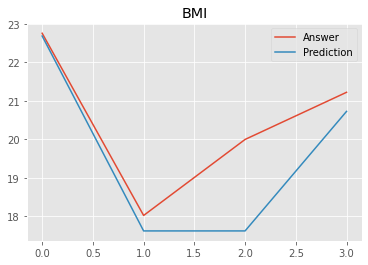

In [ ]:
import matplotlib.pyplot as plt

plt.title('BMI')
plt.plot(y_test, label="Answer")
plt.plot(prediction, label="Prediction")
plt.legend()


plt.show()

$$
\text{MSE}(c) = \frac{1}{n} \sum_{i=1}^n(x_i-c)^2
$$

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print(f"Root Mean Square:{np.sqrt(mse)}")

Root Mean Square:1.2304201718698495


# １３）Keras

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten, Dropout
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

## LeNet

In [ ]:
def lenet(input_shape, num_classes):

 model =Sequential()
 # Convolution using 20 5 x 5 filters and propagation of values to the next layer by the activation function Relu

 # When padding="same", the size of the feature map is 28 x 28, the same as the input, so the output is 28 x 28 x 20.
 model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=input_shape, activation="relu"))
  # MaxPooling is performed to compress the feature map to 14 x 14 x 20 after processing to find the maximum value every 2 x 2 regions.
 model.add(MaxPooling2D(pool_size=(2,2)))
  # A general technique that can be placed on CNN is to increase the number of filters in the convolution the deeper it is.

 model.add(Conv2D(50, kernel_size=5, padding="same", activation="relu"))
  # Output: 7 x 7 x 50
 model.add(MaxPooling2D(pool_size=(2,2)))

 # The output is converted to a vector.
 model.add(Flatten())
 model.add(Dense(500, activation="relu"))

 # It is used to classify num_classes.
 model.add(Dense(num_classes))
 model.add(Activation("softmax"))
 return model

In [ ]:
class MNISTDataset():
  def __init__(self):
    self.image_shape = (28, 28, 1)
    self.num_classes = 10

  def get_batch(self):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train, x_test = [self.preprocess(d) for d in [x_train, x_test]]
    y_train, y_test = [self.preprocess(d, label_data=True) for d in [y_train, y_test]]
    return x_train, y_train, x_test, y_test

  def preprocess(self, data, label_data=False):
    if label_data:
      data = keras.utils.to_categorical(data, self.num_classes)
    else:
      data = data.astype("float32")
      data /= 255
      shape = (data.shape[0],) + self.image_shape
      data = data.reshape(shape)
    return data
    

In [ ]:
class Trainer():
  def __init__(self, model, loss, optimizer):
    self._target = model
    self._target.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

  def train(self, x_train, y_train, batch_size, epochs, validation_split):
      self._target.fit(
          x_train, y_train,
          batch_size=batch_size,
          epochs = epochs,
          validation_split = validation_split
      )

In [ ]:
dataset = MNISTDataset()
x_train, y_train, x_test, y_test = dataset.get_batch()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
model = lenet(dataset.image_shape, dataset.num_classes)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1225500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [ ]:
trainer = Trainer(model, loss="categorical_crossentropy", optimizer=Adam())
trainer.train(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1922 - accuracy: 0.9421 - val_loss: 0.0661 - val_accuracy: 0.9803
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0525 - accuracy: 0.9835 - val_loss: 0.0504 - val_accuracy: 0.9843
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0395 - val_accuracy: 0.9872
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0396 - val_accuracy: 0.9887
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0349 - val_accuracy: 0.9901
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0441 - val_accuracy: 0.9893
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0348 - val_accuracy: 0.9902
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print(f"Loss:{score[0]}, Accuracy:{score[1]}")

Loss:0.03862691670656204, Accuracy:0.9921000003814697


## VGG

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import keras.preprocessing.image as Image
import numpy as np

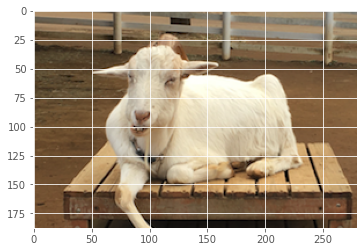

In [ ]:
import matplotlib.pyplot as plt
# Please upload any file from the left folder mark and then specify it.
image_path = "goat.png"
image = Image.load_img(image_path, target_size=(188,280))
plt.imshow(image)
plt.show()

In [ ]:
model = VGG16(weights="imagenet", include_top=True)

553467904/553467096 [==============================] - 16s 0us/step


In [ ]:
image_path = "goat.png"
image = Image.load_img(image_path, target_size=(224, 224))

x = Image.img_to_array(image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

result = model.predict(x)
result = decode_predictions(result, top=10)[0]
for res in result:
  print(f"Label:{res[1]}, Probability:{round(100*res[2],1)}%")


40960/35363 [==================================] - 0s 0us/step
Label:ram, Probability:36.3%
Label:ox, Probability:17.8%
Label:borzoi, Probability:17.5%
Label:oxcart, Probability:7.1%
Label:Ibizan_hound, Probability:4.8%
Label:worm_fence, Probability:2.9%
Label:wallaby, Probability:2.8%
Label:llama, Probability:1.6%
Label:hog, Probability:1.0%
Label:kelpie, Probability:0.6%


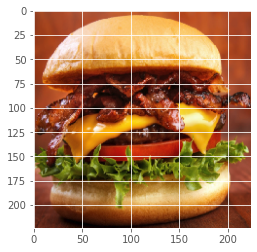

In [ ]:
# Please upload any file from the left folder mark and then specify it.
image_path = "hamburger2.png"
image = Image.load_img(image_path, target_size=(224,224))
plt.imshow(image)
plt.show()

In [ ]:
x = Image.img_to_array(image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

result = model.predict(x)
result = decode_predictions(result, top=10)[0]

for res in result:
  print(f"Label:{res[1]}, Probability:{round(100*res[2],1)}%")

Label:cheeseburger, Probability:100.0%
Label:bagel, Probability:0.0%
Label:guacamole, Probability:0.0%
Label:hotdog, Probability:0.0%
Label:meat_loaf, Probability:0.0%
Label:potpie, Probability:0.0%
Label:burrito, Probability:0.0%
Label:plate, Probability:0.0%
Label:broccoli, Probability:0.0%
Label:mushroom, Probability:0.0%
